## Importing Libraries and data

In [2]:
import numpy as np
import os
import plotly
import chart_studio.plotly as py
from plotly import graph_objs as go
from __future__ import division
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [1]:
import pandas as pd

In [45]:

dfHome = pd.read_csv('home_page_table.csv')
dfSearch = pd.read_csv('search_page_table.csv')
dfPaymentC1 = pd.read_csv('payment_confirmation_table.csv')
dfPaymentP2 = pd.read_csv('payment_page_table.csv')
UserTable = pd.read_csv('user_table.csv')

#### Basic EDA

In [47]:
UserTable.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [5]:
print(dfHome.shape)
dfHome['page'].value_counts()

(90400, 2)


page
home_page    90400
Name: count, dtype: int64

In [6]:
print(dfSearch.shape)
dfSearch['page'].value_counts()

(45200, 2)


page
search_page    45200
Name: count, dtype: int64

In [7]:
print(dfPaymentP2.shape)
dfPaymentP2['page'].value_counts()

(6030, 2)


page
payment_page    6030
Name: count, dtype: int64

In [8]:
print(dfPaymentC1.shape)
dfPaymentC1['page'].value_counts()

(452, 2)


page
payment_confirmation_page    452
Name: count, dtype: int64

In [104]:
dfPaymentC1.head()

,user_id,Step Four
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


##### As we can see the conversion rates have been reducing from welcome page to payment confirmation page

<strong><h2 id="C1">Data preparation</h2></strong>

In [9]:
data_table = [['Phases', 'Values'],
               ['dfHome', dfHome['user_id'].count()],
               ['dfSearch', dfSearch['user_id'].count()],
               ['dfPaymentP2', dfPaymentP2['user_id'].count()],
               ['dfPaymentC1', dfPaymentC1['user_id'].count()],
               ['UserTable', UserTable['user_id'].count()]]

In [10]:
data_table

[['Phases', 'Values'],
 ['dfHome', 90400],
 ['dfSearch', 45200],
 ['dfPaymentP2', 6030],
 ['dfPaymentC1', 452],
 ['UserTable', 90400]]

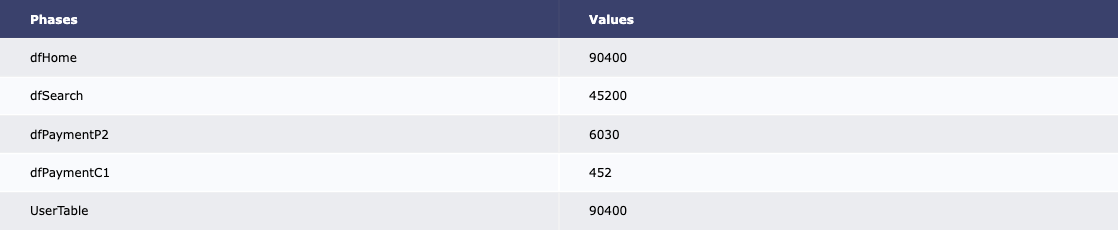

In [12]:
table = ff.create_table(data_table)
iplot(table)

<strong><h2 id="C2">Basic conversion funnel</h2></strong>

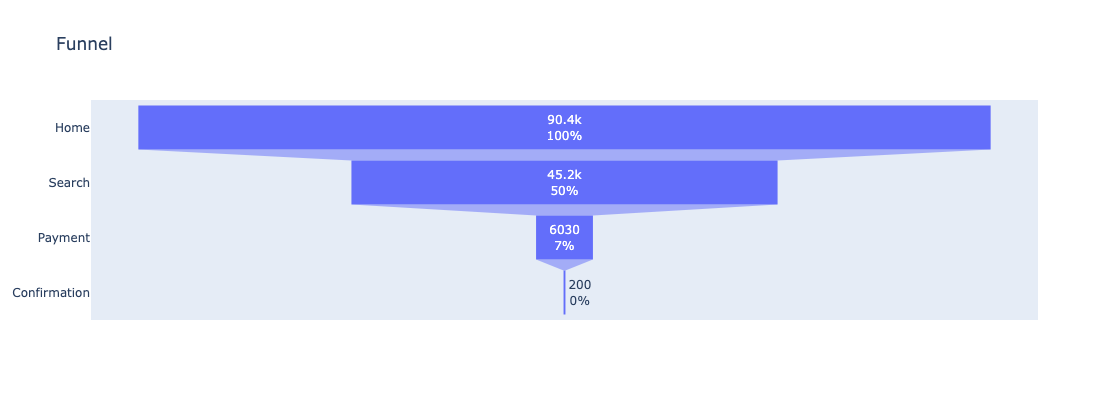

In [169]:
import plotly.graph_objects as go

# Data for the funnel chart
stages = ["Home", "Search", "Payment", "Confirmation"]
values = [dfHome['user_id'].count(), dfSearch['user_id'].count(), dfPaymentP2['user_id'].count(), 200]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=stages,  # Labels for each stage
    x=values,  # Values for each stage
    textinfo="value+percent initial"  # Display both value and percentage
))

# Customize layout
fig.update_layout(
    title="Funnel",
    funnelareacolorway=["#636EFA", "#EF553B", "#00CC96", "#AB63FA"],  # Custom colors
    width=600,
    height=400
)

# Show the chart
fig.show()


## Conversion Rate
1. From **Search** page to **Payment** is only **7%**.
2. From **Payment** page to **Confirmation** page is only **1%**.

---

## Possible Issues

1. **Between "Search" and "Payment"**:
   - (a) Users may face issues such as unclear product details, pricing concerns, or lack of desired products.
   - (b) Payment options or the user interface might be causing friction.

2. **Between "Payment" and "Confirmation"**:
   - (a) Payment errors or a lack of trust in the platform may contribute to the high drop-off.

---

## Recommendations

### Improve Search Experience
- Optimize search functionality with better filters and suggestions to reduce drop-offs.
- Highlight promotions or discounts at this stage.

### Enhance Payment Process
- Simplify the payment process with fewer steps and multiple payment options.
- Ensure security and reliability in payment methods to build user trust.

### Follow-Up on Abandoned Payments
- Send reminders or incentives (like discounts) to users who leave at the payment stage.
- Use retargeting campaigns to encourage users to complete their purchases.

### Analyze User Feedback
- Collect feedback from users at each stage to understand pain points and make informed improvements.



<strong><h2 id="C3">Preparing and merging data for the segmented funnels</h2></strong>

In [109]:
dfT = UserTable.merge(dfHome, how ='outer',on='user_id').merge(dfSearch, how ='outer', on='user_id').merge(dfPaymentP2, how ='outer', on='user_id').merge(dfPaymentC1, how ='outer', on='user_id')

In [110]:
dfT.head()

,user_id,date,device,sex,Step One,Step Two,Step Three,Step Four
0,17,2015-04-21,Desktop,Male,home_page,search_page,NaN,NaN
1,28,2015-04-29,Desktop,Male,home_page,NaN,NaN,NaN
2,37,2015-02-21,Mobile,Male,home_page,search_page,NaN,NaN
3,38,2015-03-23,Mobile,Female,home_page,search_page,payment_page,NaN
4,55,2015-02-01,Desktop,Male,home_page,NaN,NaN,NaN


In [96]:
Step_One_Desktop_Male =(dfT['sex'] == 'Male') &  (dfT['device'] == 'Desktop') & (dfT['Step One'] == 'home_page')
Step_One_Mobile_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Mobile') & (dfT['Step One'] == 'home_page')
Step_One_Desktop_Female =(dfT['sex'] == 'Female') &  (dfT['device'] == 'Desktop') & (dfT['Step One'] == 'home_page')
Step_One_Mobile_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Mobile') & (dfT['Step One'] == 'home_page')

Step_Two_Desktop_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Desktop') & (dfT['Step Two'] == 'search_page')
Step_Two_Mobile_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Mobile') & (dfT['Step Two'] == 'search_page')
Step_Two_Desktop_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Desktop') & (dfT['Step Two'] == 'search_page')
Step_Two_Mobile_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Mobile') & (dfT['Step Two'] == 'search_page')

Step_Three_Desktop_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Desktop') & (dfT['Step Three'] == 'payment_page')
Step_Three_Mobile_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Mobile') & (dfT['Step Three'] == 'payment_page')
Step_Three_Desktop_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Desktop') & (dfT['Step Three'] == 'payment_page')
Step_Three_Mobile_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Mobile') & (dfT['Step Three'] == 'payment_page')

Step_Four_Desktop_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Desktop') & (dfT['Step Four'] == 'payment_confirmation_page')
Step_Four_Mobile_Male =(dfT['sex'] == 'Male') & (dfT['device'] == 'Mobile') & (dfT['Step Four'] == 'payment_confirmation_page')
Step_Four_Desktop_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Desktop') & (dfT['Step Four'] == 'payment_confirmation_page')
Step_Four_Mobile_Female =(dfT['sex'] == 'Female') & (dfT['device'] == 'Mobile') & (dfT['Step Four'] == 'payment_confirmation_page')

data_tableTop = [['Phases', 'Desktop Male', 'Mobile Male', 'Desktop Female', 'Mobile Female'],
               ['Home', Step_One_Desktop_Male.sum(), Step_One_Mobile_Male.sum(), Step_One_Desktop_Female.sum(), Step_One_Mobile_Female.sum()],
               ['Search',Step_Two_Desktop_Male.sum(), Step_Two_Mobile_Male.sum(), Step_Two_Desktop_Female.sum(), Step_Two_Mobile_Female.sum()],
               ['Payment', Step_Three_Desktop_Male.sum(), Step_Three_Mobile_Male.sum(), Step_Three_Desktop_Female.sum(), Step_Three_Mobile_Female.sum()],
               ['Confirmation', Step_Four_Desktop_Male.sum(), Step_Four_Mobile_Male.sum(), Step_Four_Desktop_Female.sum(), Step_Four_Mobile_Female.sum()]]



In [97]:
data_tableTop

[['Phases', 'Desktop Male', 'Mobile Male', 'Desktop Female', 'Mobile Female'],
 ['Home', 30203, 15122, 29997, 15078],
 ['Search', 15009, 7515, 15091, 7585],
 ['Payment', 1480, 1450, 1530, 1570],
 ['Confirmation', 76, 135, 74, 167]]

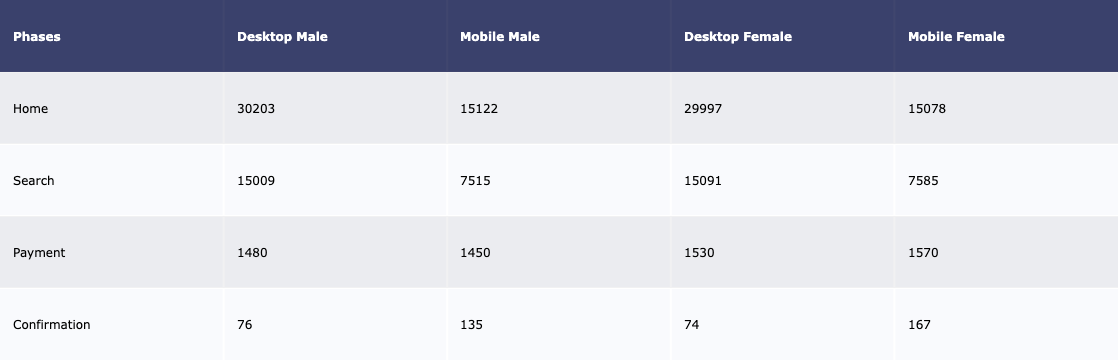

In [79]:
table = ff.create_table(data_tableTop)
iplot(table)

In [80]:
dfFull = pd.DataFrame(np.array([['Home', 30203, 15122, 29997, 15078], ['Search', 15009, 7515, 15091, 7585], ['Payment', 1480, 1450, 1530, 1570], ['Confirmation', 76, 135, 74, 167]]),
                            columns=['','Desktop Male', 'Mobile Male', 'Desktop Female', 'Mobile Female'])
dfFull = dfFull.set_index('')

In [81]:
dfFull['Desktop Male'] = dfFull['Desktop Male'].astype('int')
dfFull['Mobile Male'] = dfFull['Mobile Male'].astype('int')
dfFull['Desktop Female'] = dfFull['Desktop Female'].astype('int')
dfFull['Mobile Female'] = dfFull['Mobile Female'].astype('int')


In [82]:
dfFull = dfFull.reset_index(names ='phase')

In [83]:
dfFull

,phase,Desktop Male,Mobile Male,Desktop Female,Mobile Female
0,Home,30203,15122,29997,15078
1,Search,15009,7515,15091,7585
2,Payment,1480,1450,1530,1570
3,Confirmation,76,135,74,167


<strong><h2 id="C6">Segmented funnel analysis using finnel chart and pie chart - By gender and device</h2></strong>

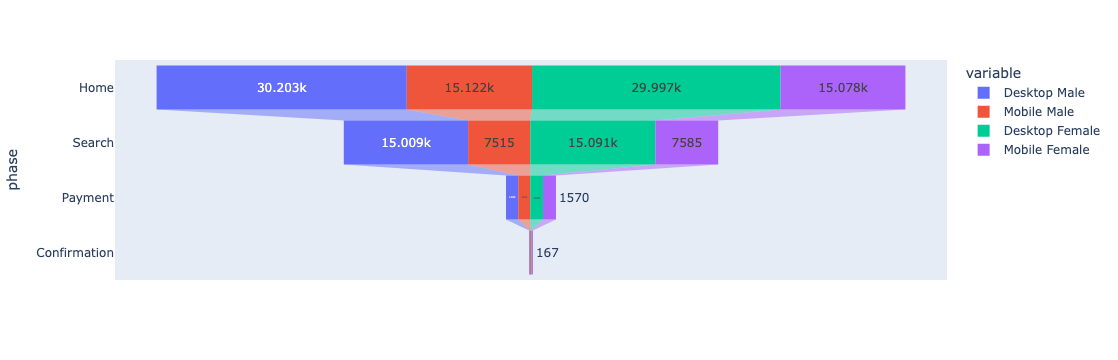

In [87]:
import plotly.express as px
fig = px.funnel(dfFull, x=['Desktop Male',	'Mobile Male',	'Desktop Female',	'Mobile Female'], y='phase')
fig.show()

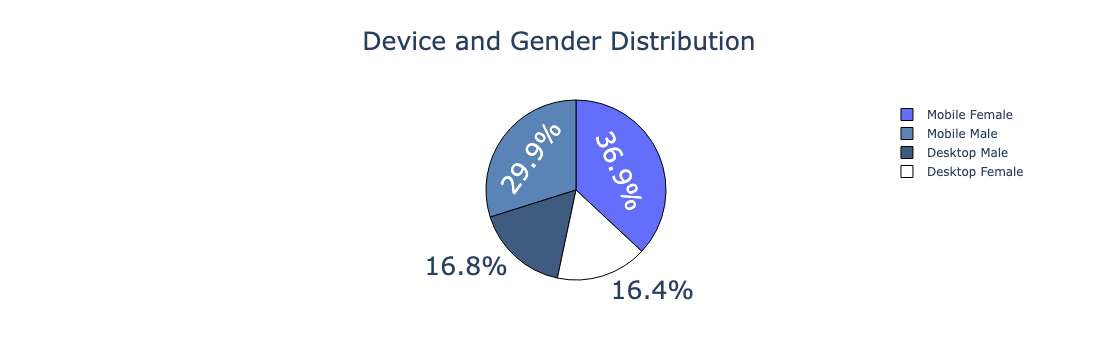

In [93]:
labels = ['Desktop Male', 'Mobile Male', 'Desktop Female', 'Mobile Female']
values = [76, 135, 74, 167]
colors = ['rgb(63,92,128)', 'rgb(90,131,182)', 'rgb(255,255,255)']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=25),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=1)))

layout = go.Layout(
    title=dict(
        text="Device and Gender Distribution",  # Add your title text here
        x=0.5,  # Centers the title
        font=dict(size=25)  # Adjust the title font size
    )
)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig, filename='styled_pie_chart')

**Key Insights:**
- **Mobile Dominance:** Mobile users account for **66.8%** of conversions, with Mobile Female users leading at **36.9%**.
- **Desktop Lagging:** Desktop users contribute only **33.2%**, indicating potential optimization opportunities.
- **Female Preference:** Female users (**53.3%**) slightly outperform male users (**46.7%**) in conversions.

**Recommendations:**
- **Focus on Mobile:** Optimize mobile UX and checkout flows to enhance mobile conversions.
- **Boost Desktop Performance:** Address desktop-specific bottlenecks and retarget desktop users with tailored incentives.
- **Targeted Campaigns:** Leverage female audience preferences while creating strategies to engage more male users.


## Time series analysis

In [99]:
dfT.head()

,user_id,date,device,sex,Step One,Step Two,Step Three,Step Four
0,17,2015-04-21,Desktop,Male,home_page,search_page,NaN,NaN
1,28,2015-04-29,Desktop,Male,home_page,NaN,NaN,NaN
2,37,2015-02-21,Mobile,Male,home_page,search_page,NaN,NaN
3,38,2015-03-23,Mobile,Female,home_page,search_page,payment_page,NaN
4,55,2015-02-01,Desktop,Male,home_page,NaN,NaN,NaN


In [119]:
dfT = dfT.fillna(0)
dfT = dfT.rename(columns={'Step One': 'home_page','Step Two':'search_page','Step Three':'payment_page','Step Four':'payment_confirmation_page'})
dummy = pd.get_dummies(dfT.iloc[:,4:],prefix='',prefix_sep='')
dummy = dummy.drop('0',axis = 1)
dataNew = pd.concat([dfT.iloc[:,0:4],dummy],axis=1)

In [120]:
dataNew.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,17,2015-04-21,Desktop,Male,True,True,False,False
1,28,2015-04-29,Desktop,Male,True,False,False,False
2,37,2015-02-21,Mobile,Male,True,True,False,False
3,38,2015-03-23,Mobile,Female,True,True,True,False
4,55,2015-02-01,Desktop,Male,True,False,False,False


In [122]:
dataNew['date'] = pd.to_datetime(dataNew['date'])

In [127]:
website_visits = dataNew.groupby('date')['home_page'].sum()

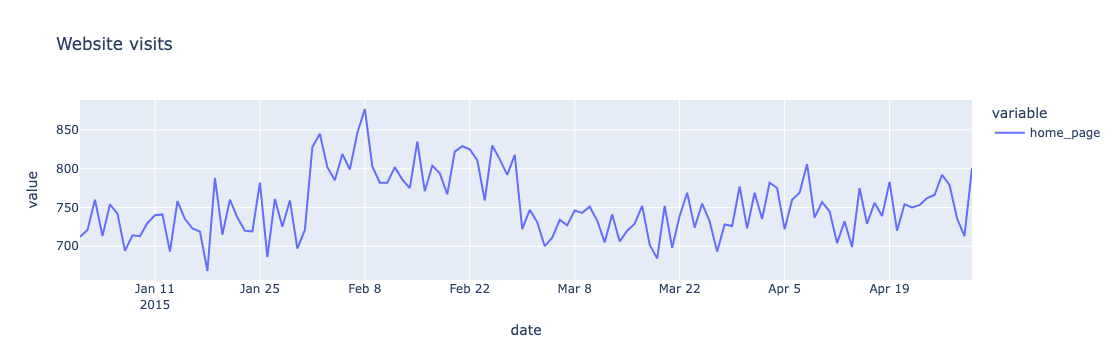

In [130]:
fig = px.line(website_visits, title='Website visits')
fig.show()

In [147]:
conversions = dataNew.groupby(['date'])[['home_page' , 'search_page', 'payment_page', 'payment_confirmation_page']].sum()

In [154]:
conversions_devices = dataNew.groupby(['date','device'])[['home_page' , 'search_page', 'payment_page', 'payment_confirmation_page']].sum()

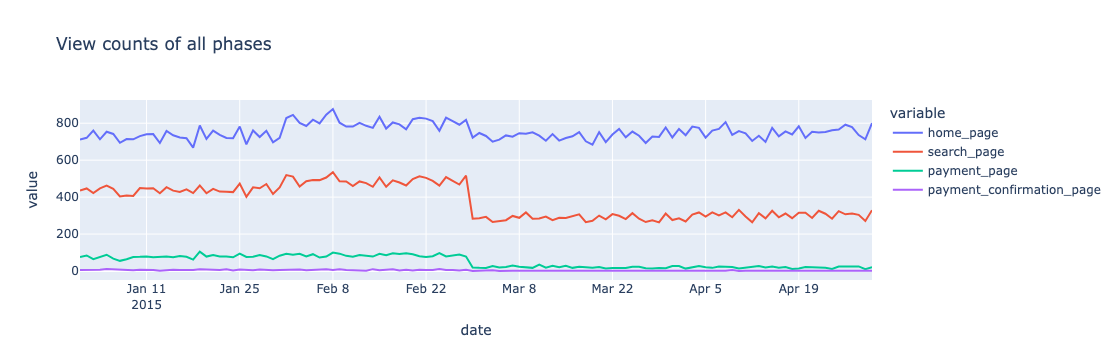

In [148]:
fig = px.line(conversions, title='View counts of all phases')
fig.show()

In [139]:
conversions.head()

,home_page,search_page,payment_page,payment_confirmation_page
date,,,,
2015-01-01,712,436,76,6
2015-01-02,721,447,84,5
2015-01-03,760,422,64,7
2015-01-04,713,447,76,7
2015-01-05,754,462,88,11


In [141]:
conTime = pd.DataFrame()
conTime.index = conversions.index
conTime['searchPage'] = conversions['search_page']/conversions['home_page']
conTime['paymentPage'] = conversions['payment_page']/conversions['search_page']
conTime['paid'] = conversions['payment_confirmation_page']/conversions['payment_page']
conTime.head()

,searchPage,paymentPage,paid
date,,,
2015-01-01,0.612360,0.174312,0.078947
2015-01-02,0.619972,0.187919,0.059524
2015-01-03,0.555263,0.151659,0.109375
2015-01-04,0.626928,0.170022,0.092105
2015-01-05,0.612732,0.190476,0.125000


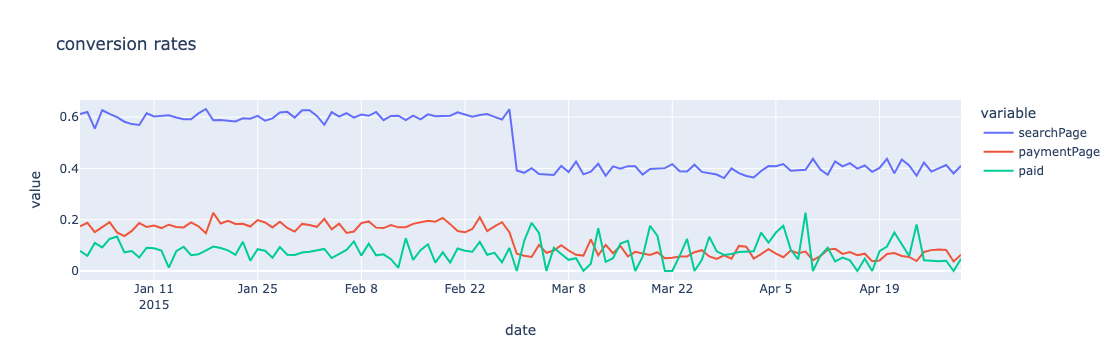

In [143]:
fig = px.line(conTime, title='conversion rates')
fig.show()

#### Major drop in conversion on March 1st 2015, the websites logs should be checked for probable cause

In [155]:
conversions_devices = conversions_devices.reset_index()
conversions_devices.head()

,date,device,home_page,search_page,payment_page,payment_confirmation_page
0,2015-01-01,Desktop,493,256,47,1
1,2015-01-01,Mobile,219,180,29,5
2,2015-01-02,Desktop,484,261,44,1
3,2015-01-02,Mobile,237,186,40,4
4,2015-01-03,Desktop,507,222,22,3


In [156]:
conversions_mobile = conversions_devices[conversions_devices['device'] == 'Mobile']
conversions_desktop = conversions_devices[conversions_devices['device'] == 'Desktop']

In [159]:
conTime_mobile = pd.DataFrame()
conTime_mobile['date'] = conversions_mobile['date']
conTime_mobile['searchPage'] = conversions_mobile['search_page']/conversions_mobile['home_page']
conTime_mobile['paymentPage'] = conversions_mobile['payment_page']/conversions_mobile['search_page']
conTime_mobile['paid'] = conversions_mobile['payment_confirmation_page']/conversions_mobile['payment_page']
conTime_mobile.head()

,date,searchPage,paymentPage,paid
1,2015-01-01,0.821918,0.161111,0.172414
3,2015-01-02,0.784810,0.215054,0.100000
5,2015-01-03,0.790514,0.210000,0.095238
7,2015-01-04,0.828452,0.191919,0.157895
9,2015-01-05,0.785978,0.239437,0.156863


In [160]:
conTime_desktop = pd.DataFrame()
conTime_desktop['date'] = conversions_desktop['date']
conTime_desktop['searchPage'] = conversions_desktop['search_page']/conversions_desktop['home_page']
conTime_desktop['paymentPage'] = conversions_desktop['payment_page']/conversions_desktop['search_page']
conTime_desktop['paid'] = conversions_desktop['payment_confirmation_page']/conversions_desktop['payment_page']
conTime_desktop.head()

,date,searchPage,paymentPage,paid
0,2015-01-01,0.519270,0.183594,0.021277
2,2015-01-02,0.539256,0.168582,0.022727
4,2015-01-03,0.437870,0.099099,0.136364
6,2015-01-04,0.525316,0.152610,0.026316
8,2015-01-05,0.515528,0.148594,0.081081


In [161]:
data = pd.merge(left = conTime_desktop, right = conTime_mobile, how = 'left', on='date', suffixes=('_desktop', '_mobile'))

In [166]:
data.set_index('date',inplace  = True)

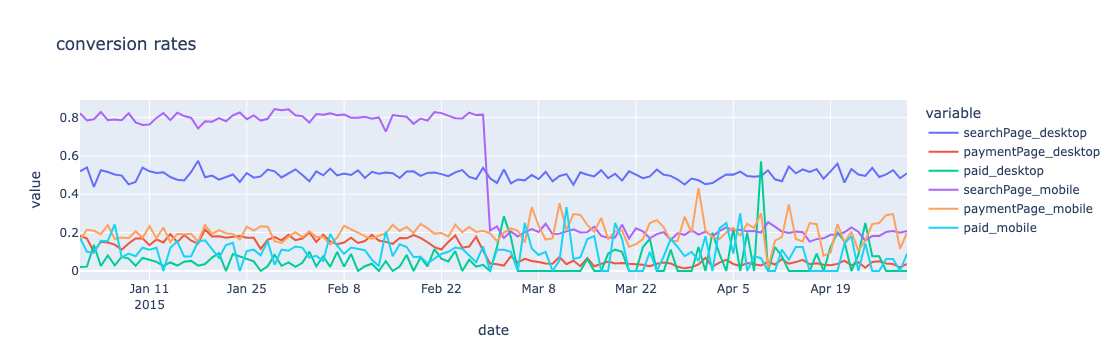

In [168]:
fig = px.line(data, title='conversion rates')
fig.show()

#### Major drop in conversion rate on March 1st 2015 on the mobile app, the app logs should be checked for probable cause